# Import Modules

In [2]:
#Data Analysis
import pandas as pd
import numpy as np
import missingno as msno 
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Selection & Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Data Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

#Cross Validation
from sklearn.metrics import accuracy_score, classification_report


#Statistics
import statsmodels.api as sm

#Machine Learning
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#GridSearch CV to find best parameters for Random Forest and XGBoost
from sklearn.model_selection import GridSearchCV

#Feature Importance
import shap


# Data Import & Cleaning


In [4]:
# read the dataset from google drive
hrdata_orig = pd.read_csv("employee.csv",delimiter=',')

#hrdata_orig = pd.read_csv("employee.csv",delimiter=',')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
hrdata=pd.get_dummies(hrdata_orig, prefix=None, drop_first=True)

hrdata.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,True,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False


In [5]:
# Convert rows with Boolean to Integers
hrdata = hrdata.replace({True:1, False:0})
pd.options.display.max_columns = None
pd.options.display.max_rows = None
hrdata.head()

C:\Users\moyot\AppData\Local\Temp\ipykernel_34472\1947378519.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hrdata = hrdata.replace({True:1, False:0})


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [6]:
hrdata.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufactur

In [7]:
# Check for missing values
hrdata.isnull().sum()

Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager     

<Axes: >

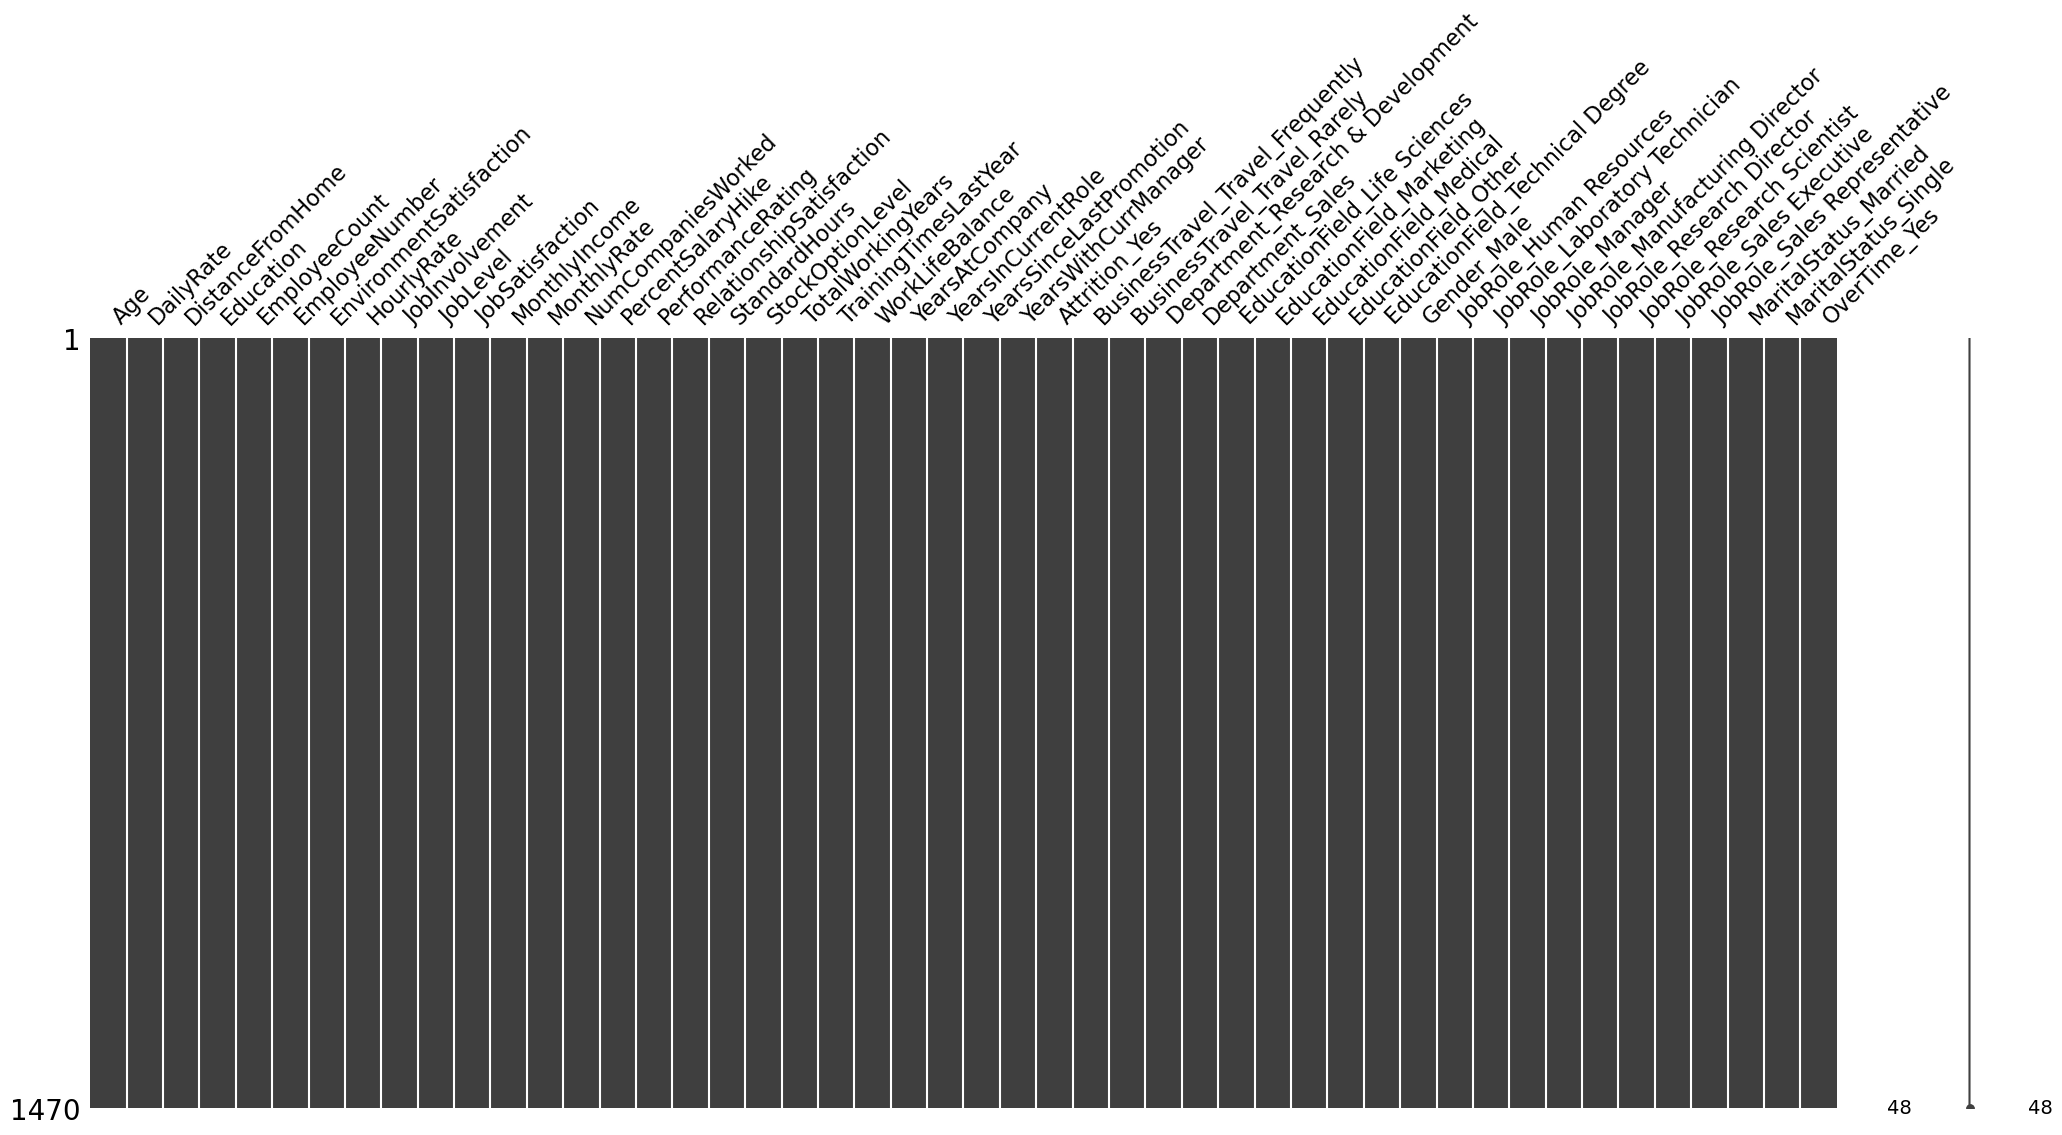

In [8]:
# Visualize missing values as a matrix 
msno.matrix(hrdata) 

In [9]:
# Summary Statistics
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeCount                      1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [10]:
hrdata.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224,0.188435,0.709524,0.653741,0.303401,0.412245,0.108163,0.315646,0.055782,0.089796,0.600000,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728,0.282993
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863,0.391193,0.454137,0.475939,0.459884,0.492406,0.310692,0.464931,0.229579,0.285986,0.490065,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530,0.450606
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000,0.000000,1.000000,1.

Total 100.0


([<matplotlib.patches.Wedge at 0x13532621be0>,
 [Text(1.0900447391296946, 0.14765658365164785, 'HR'),
  Text(-0.7516298518543802, 0.8031516455821793, 'R&D'),
  Text(0.6370178454585012, -0.8967765967995649, 'Sales')],
 [Text(0.5945698577071061, 0.08053995471908064, '4.3%'),
  Text(-0.4099799191932983, 0.4380827157720978, '65.4%'),
  Text(0.3474642793410006, -0.4891508709815808, '30.3%')])

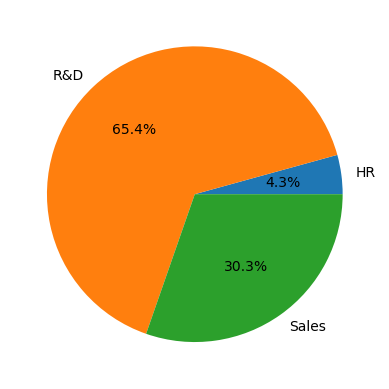

In [11]:
#Understanding Research Departments
HR=hrdata[(hrdata['Department_Research & Development']==0) & (hrdata['Department_Sales']==0)]

RnD=hrdata[hrdata['Department_Research & Development']==1]
Sales=hrdata[hrdata['Department_Sales']==1]
HR_percent=(len(HR)/len(hrdata))*100
RnD_percent=(len(RnD)/len(hrdata))*100
Sales_percent=(len(Sales)/len(hrdata))*100
print('Total', HR_percent+ RnD_percent+Sales_percent)
# display piechart of Departments
labels = 'HR', 'R&D', 'Sales'
sizes = [HR_percent, RnD_percent, Sales_percent]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x13532642720>,
 [Text(0.6931655117563703, 0.8541203506014416, 'Overtime'),
  Text(-0.6931655117563701, -0.8541203506014418, 'No Overtime')],
 [Text(0.3780902791398383, 0.4658838276007863, '28.3%'),
  Text(-0.37809027913983817, -0.46588382760078634, '71.7%')])

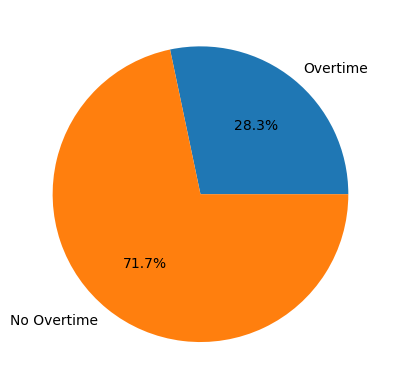

In [12]:
Overtime=len(hrdata[hrdata['OverTime_Yes']==1])/len(hrdata)
No_Overtime=len(hrdata[hrdata['OverTime_Yes']==0])/len(hrdata)

# display piechart of Departments
labels = 'Overtime', 'No Overtime'
sizes = [Overtime, No_Overtime]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')


In [13]:
#Understanding Attrition 
#Attrition Rate entire population

Attrition=hrdata[hrdata['Attrition_Yes']==1]
Attrition_RnD=hrdata[(hrdata['Attrition_Yes']==1) & (hrdata['Department_Research & Development']==1)]
Attrition_Sales=hrdata[(hrdata['Attrition_Yes']==1) & (hrdata['Department_Sales']==1)]
Attrition_HR=hrdata[(hrdata['Attrition_Yes']==1) & (hrdata['Department_Sales']==0) & (hrdata['Department_Research & Development']==0)]
Attrition_Overtime=hrdata[(hrdata['Attrition_Yes']==1) & (hrdata['OverTime_Yes']==1)]
Attrition_rate=len(Attrition)/len(hrdata)
print('Rate of Attrition:',Attrition_rate)
print('Rate of Attrition (R&D):',len(Attrition_RnD)/len(hrdata[hrdata['Department_Research & Development']==1]))
print('Rate of Attrition (Sales)',len(Attrition_Sales)/len(hrdata[hrdata['Department_Sales']==1]))
print('Rate of Attrition (HR)',len(Attrition_HR)/len(hrdata[(hrdata['Department_Sales']==0) & (hrdata['Department_Research & Development']==0)]))
print('Rate of Attrition of Employees who work Overtime',len(Attrition_Overtime)/len(hrdata[hrdata['OverTime_Yes']==1]))


Rate of Attrition: 0.16122448979591836
Rate of Attrition (R&D): 0.1383975026014568
Rate of Attrition (Sales) 0.2062780269058296
Rate of Attrition (HR) 0.19047619047619047
Rate of Attrition of Employees who work Overtime 0.30528846153846156


In [14]:
#Pipeline to clean data
#Divide data
numeric=hrdata.loc[:,:'YearsWithCurrManager']
numeric=numeric.drop(['EmployeeCount','EmployeeNumber'], axis=1)
categ=hrdata.loc[:,'Attrition_Yes':] 
categ = categ.drop('Attrition_Yes', axis=1)

y = hrdata['Attrition_Yes'] #Dependent Variable

#standardize numerical data only
numeric_transformer=Pipeline(steps=[("scaler", StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="category"))])
numerical_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor)])

numeric_clean= numerical_pipeline.fit_transform(numeric)
Xnumeric=pd.DataFrame(numeric_clean, columns=numeric.columns, index=numeric.index)

# Join categorical and standardized numerical columns by index
X=Xnumeric.join(categ, lsuffix="_left", rsuffix="_right")
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   DailyRate                          1470 non-null   float64
 2   DistanceFromHome                   1470 non-null   float64
 3   Education                          1470 non-null   float64
 4   EnvironmentSatisfaction            1470 non-null   float64
 5   HourlyRate                         1470 non-null   float64
 6   JobInvolvement                     1470 non-null   float64
 7   JobLevel                           1470 non-null   float64
 8   JobSatisfaction                    1470 non-null   float64
 9   MonthlyIncome                      1470 non-null   float64
 10  MonthlyRate                        1470 non-null   float64
 11  NumCompaniesWorked                 1470 non-null   float

# Data Analysis

Text(0.5, 1.0, 'Correlation Matrix')

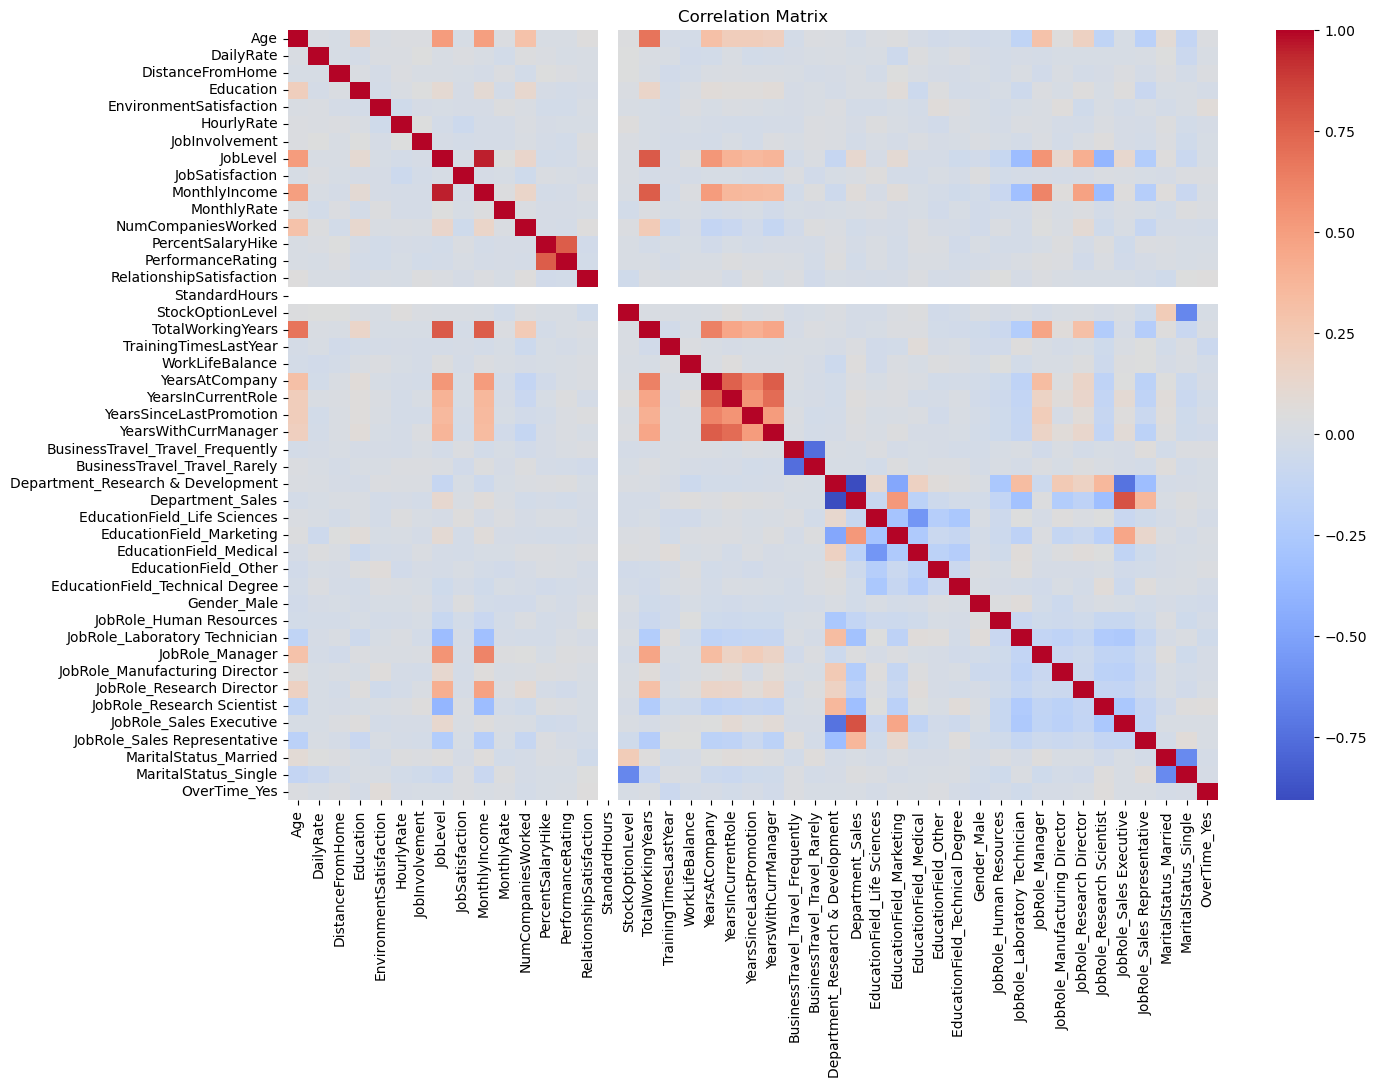

In [17]:
# Correlation Analysis

correlation_matrix=X.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',  fmt=".2f")
plt.title('Correlation Matrix')

In [18]:
# Detecting Multicollinearity with VIF ( Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

C:\Users\moyot\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                              feature        VIF
0                                 Age   2.082971
1                           DailyRate   1.034885
2                    DistanceFromHome   1.021649
3                           Education   1.081864
4             EnvironmentSatisfaction   1.029679
5                          HourlyRate   1.026438
6                      JobInvolvement   1.032466
7                            JobLevel  14.088248
8                     JobSatisfaction   1.024956
9                       MonthlyIncome  18.097043
10                        MonthlyRate   1.021432
11                 NumCompaniesWorked   1.282174
12                  PercentSalaryHike   2.564408
13                  PerformanceRating   2.550458
14           RelationshipSatisfaction   1.027475
15                      StandardHours        NaN
16                   StockOptionLevel   1.889282
17                  TotalWorkingYears   5.009866
18              TrainingTimesLastYear   1.036030
19                  

## Multicollinearity Analysis

In [20]:
multi_co=vif_data[vif_data['VIF']>5]
multi_co['feature'].tolist()

['JobLevel',
 'MonthlyIncome',
 'TotalWorkingYears',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative']

In [21]:
#drop columns with high VIF
X=X.drop(['JobLevel',
 'MonthlyIncome',
 'TotalWorkingYears',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative'],axis=1)

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1470 non-null   float64
 1   DailyRate                         1470 non-null   float64
 2   DistanceFromHome                  1470 non-null   float64
 3   Education                         1470 non-null   float64
 4   EnvironmentSatisfaction           1470 non-null   float64
 5   HourlyRate                        1470 non-null   float64
 6   JobInvolvement                    1470 non-null   float64
 7   JobSatisfaction                   1470 non-null   float64
 8   MonthlyRate                       1470 non-null   float64
 9   NumCompaniesWorked                1470 non-null   float64
 10  PercentSalaryHike                 1470 non-null   float64
 11  PerformanceRating                 1470 non-null   float64
 12  Relati

## PCA Analysis

[0.14456732 0.08279531 0.06715153 0.05587801 0.05054873 0.04935128
 0.04900969 0.04841928 0.04600921 0.04573686 0.04472055 0.04321013
 0.04270999 0.04110733 0.03769468 0.02829668 0.02440734 0.01326523
 0.01246573 0.01127924 0.01045884 0.00944551 0.00892891 0.0082088
 0.00697362 0.00557254 0.00352948 0.00267231 0.00248575 0.00182997
 0.00127014 0.        ]


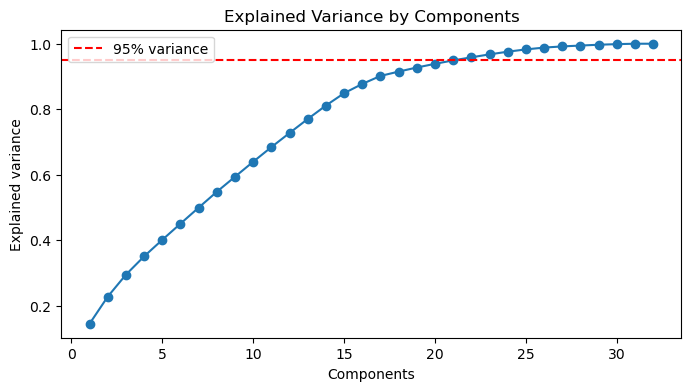

In [24]:

pca1= PCA()


X_pca1 = pca1.fit_transform(X)
print(pca1.explained_variance_ratio_)
explained_variance=np.cumsum(pca1.explained_variance_ratio_)

plt.figure(figsize=(8,4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.title('Explained Variance by Components')
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.legend(loc='upper left')
plt.show()

In [25]:
pca2= PCA(0.95) # explained 95% of the variance
X_pca2 = pca2.fit_transform(X)
print(X_pca2.shape) #( , components required )

(1470, 22)


In [26]:
#dataframe

variance=pd.DataFrame()
variance['variance']=pca2.explained_variance_ratio_
variance

,variance
0,0.144567
1,0.082795
2,0.067152
3,0.055878
4,0.050549
5,0.049351
6,0.049010
7,0.048419
8,0.046009
9,0.045737


Therefore 22 components are required to explain 95% of the variance

In [28]:
pca3 = PCA(0.80)
X_pca3 = pca3.fit_transform(X)
print(X_pca3.shape)

(1470, 14)


14 components required to explain 80% of the variance


In [30]:
#Using pca2
pca_columns = [f'PC{i+1}' for i in range(22)]
hrdata_pca= pd.DataFrame(X_pca2, columns=pca_columns)
hrdata_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,-0.522943,-1.070412,1.396614,-0.128407,0.565436,-2.442888,1.351366,-0.634460,-1.421430,-2.409788,0.335359,1.973973,-1.057856,0.420258,-1.265401,-0.810763,-0.861842,-0.321648,-0.429368,-0.767447,0.326921,0.220323
1,1.080041,3.113622,-0.488851,-1.162460,-0.047397,1.410310,0.429044,1.230876,0.907398,-0.471941,-1.117839,-0.083057,-1.610202,0.062085,-0.183566,1.495364,-0.906974,0.262938,0.286436,0.305053,0.086411,-0.098553
2,-2.286798,-0.396962,0.481755,-0.265528,0.447666,-0.202105,-1.563498,0.230125,-1.399533,-0.985641,-1.012796,1.020123,1.640998,1.031880,-1.289918,-0.232943,0.180817,-0.359370,-0.186314,0.384492,-0.022439,0.302778
3,-0.037049,-1.234504,-0.321870,-0.726062,1.007110,-0.330035,-0.506465,1.052002,0.176244,-0.195233,1.342021,0.524325,0.779200,-0.096294,1.566568,-0.003532,0.636803,1.484641,-0.310548,-0.845680,0.376567,0.813571
4,-1.511912,-1.021604,0.304133,-0.614724,-0.287487,0.293595,-0.900147,0.272484,0.548452,-0.096750,-1.178910,-0.143699,-2.210560,-2.132612,-1.336204,-1.766817,-0.017656,0.354117,0.682694,0.384197,0.516688,-0.109897


In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pca_components = pd.DataFrame(pca2.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(22)])
pca_components.head(22)  # View feature importance per PC

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
PC1,0.222297,-0.018153,0.013458,0.078037,0.006400,-0.016361,0.002415,-0.011542,-0.014946,-0.045460,-0.011506,0.013264,0.011076,-0.000000e+00,0.032657,-0.003342,0.016308,0.520615,0.492352,0.426183,0.487679,0.002430,-0.011917,-0.006421,-0.035399,0.041594,0.009790,0.021205,-0.038301,0.022562,-0.028736,-0.006195
PC2,-0.031395,0.017264,0.061848,-0.044893,-0.054883,-0.010487,-0.045220,0.028616,-0.016535,-0.051832,0.699144,0.698705,-0.073474,-0.000000e+00,0.017331,-0.013492,-0.006105,-0.011610,0.020935,-0.004371,0.009594,0.002108,-0.001602,-0.002798,0.000166,-0.000164,0.007495,-0.006231,0.009753,0.010259,-0.004983,-0.001176
PC3,0.538892,0.106688,0.027336,0.410017,-0.015549,0.150417,0.144817,-0.102121,0.010173,0.612177,0.063594,0.047768,0.107346,-0.000000e+00,0.163849,-0.146768,-0.056088,-0.065210,-0.081189,-0.031437,-0.094876,-0.015784,-0.013768,0.001713,-0.026077,0.026855,0.004551,0.023531,-0.016358,0.041002,-0.074855,0.005911
PC4,-0.141075,0.276870,0.207213,-0.065358,-0.148517,0.313592,0.212414,0.004063,-0.257606,-0.180664,-0.040442,-0.054296,-0.219093,3.469447e-18,0.662518,0.027052,-0.119328,-0.012171,0.042511,-0.052910,0.031393,-0.007015,0.015503,-0.003102,0.016739,-0.017384,-0.005484,-0.007307,0.012725,0.138742,-0.242890,-0.009977
PC5,0.098221,0.261235,-0.110668,-0.072741,0.421270,-0.488510,-0.222356,0.515526,0.131431,0.096585,-0.002997,-0.023099,-0.180607,5.551115e-17,0.292630,-0.073744,-0.076687,-0.011640,0.018502,0.003619,-0.048169,-0.002601,0.001988,-0.004992,-0.009097,0.003341,0.010444,0.003680,-0.009954,0.045190,-0.103170,0.026198
PC6,0.022064,-0.353698,-0.055667,0.009678,0.197020,0.076856,-0.312633,-0.323035,0.236435,0.066725,-0.001123,0.013832,-0.216008,-1.665335e-16,0.360909,0.261938,0.546988,-0.024070,0.001999,0.005349,-0.044973,-0.008920,-0.020103,0.003048,0.008498,0.002090,0.007839,0.005098,-0.033713,0.048767,-0.109170,-0.020267
PC7,-0.022496,-0.308066,0.615144,0.031501,0.007353,0.054319,-0.139795,0.002703,0.424950,-0.054627,-0.040069,-0.039522,-0.200427,-1.110223e-16,0.005520,-0.450378,-0.267076,-0.000327,-0.011626,0.016230,-0.003464,-0.001421,-0.000930,-0.004440,-0.002513,-0.006291,0.004325,-0.004412,0.009657,0.006865,0.001539,0.029578
PC8,-0.070216,0.300670,0.143042,-0.349205,0.535780,0.122097,0.306868,-0.274241,0.254036,-0.002122,0.033539,0.043062,0.426069,1.942890e-16,0.013632,-0.137572,0.133973,-0.004413,0.040436,0.032710,0.010222,0.000424,0.000988,0.000715,0.000039,0.002172,0.011456,-0.009225,0.001726,0.002814,-0.016495,0.038343
PC9,0.116724,0.056177,0.314563,-0.021708,-0.296775,-0.012417,0.014746,0.315482,0.413004,-0.029922,0.010286,-0.012431,0.379675,1.387779e-17,0.083853,0.607334,-0.011945,0.004344,-0.024262,0.012678,-0.039820,0.011408,-0.014211,-0.005751,0.006398,0.008948,-0.006327,0.006018,-0.025007,-0.000797,-0.016001,-0.010676
PC10,-0.078906,-0.247401,0.281800,0.241100,-0.012269,-0.227263,0.225683,0.314853,-0.314065,-0.105549,0.005164,-0.001045,0.310968,-2.775558e-17,0.101385,-0.266821,0.547831,-0.025454,0.000309,-0.040261,-0.011186,0.014771,0.034249,0.009909,-0.012797,-0.013916,-0.001955,-0.001879,0.012387,0.009809,-0.019576,0.013540


In [32]:
pca_scores = pca2.transform(X)
pca_scores

array([[-0.52294259, -1.07041204,  1.39661356, ..., -0.76744684,
         0.32692082,  0.22032307],
       [ 1.08004096,  3.11362219, -0.48885072, ...,  0.30505251,
         0.0864113 , -0.0985531 ],
       [-2.2867984 , -0.39696173,  0.48175549, ...,  0.38449208,
        -0.02243924,  0.30277844],
       ...,
       [-0.94536892,  2.57906974, -0.04248072, ..., -0.19406344,
         0.69664954,  0.72077183],
       [ 0.95146019, -0.71112293,  0.34846989, ...,  0.32000535,
         0.08769687, -0.38088522],
       [-0.94726488, -0.85703982, -0.37310813, ...,  0.36272499,
         0.63490155, -0.14947161]])

## K-Means Clustering

C:\Users\moyot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\moyot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\moyot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\moyot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

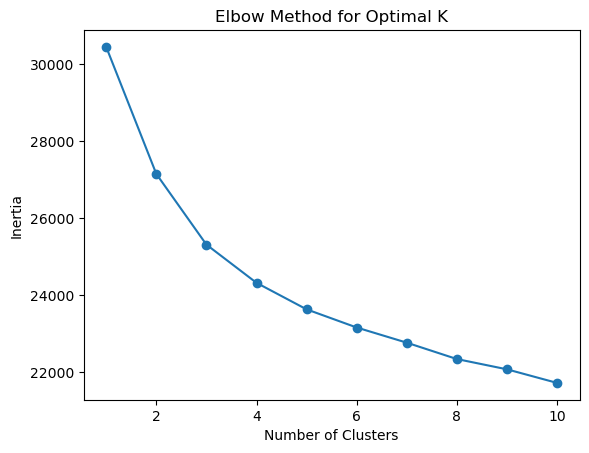

In [34]:
# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_scores)
    inertia.append(kmeans.inertia_)

# Plot elbow method result
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [35]:
# Fit K-means with optimal K (assuming K=3 from elbow method)
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
kmeans_pca=kmeans.fit(pca_scores)
kmeans_pca
#hrdata_pca['Cluster'] = kmeans.fit_predict(hrdata_pca)

#hrdata_pca.head()

C:\Users\moyot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [36]:
X=pd.concat([X.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
X.columns.values[-22:] = [f'Column {i+1}' for i in range(22)]
X['K-Means Segment'] = kmeans_pca.labels_

C:\Users\moyot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


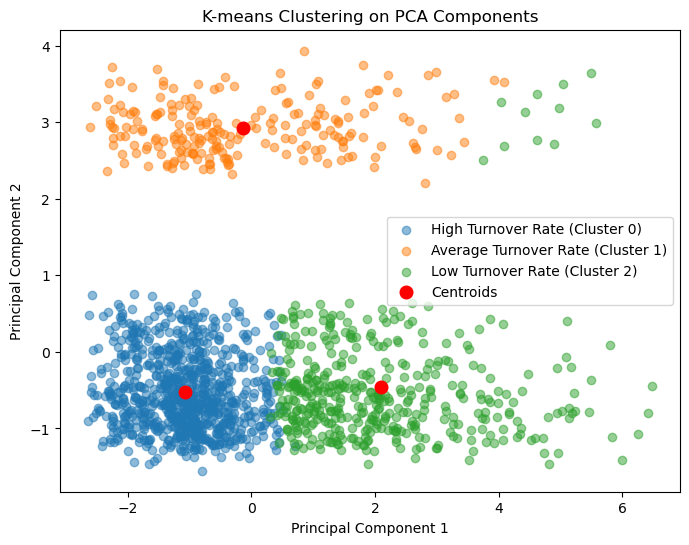

[0.1855921855921856, 0.17209302325581396, 0.11009174311926606]


In [37]:
clusters = kmeans.fit_predict(hrdata_pca)  # fitting data

# PCA DataFrame
hrdata_pca['cluster'] = clusters

centroids = kmeans.cluster_centers_

# Turnover rate for each cluster
turnover_rates = []
for i in range(3):  # Assuming 3 clusters
    cluster_data = hrdata[clusters == i]
    turnover_rate = cluster_data['Attrition_Yes'].mean()
    turnover_rates.append(turnover_rate)

# Clustering categorization based on turnover rate
cluster_names = []
for i, rate in enumerate(turnover_rates):
    if rate < 0.13:
        cluster_names.append(f"Low Turnover Rate (Cluster {i})")
    elif (rate >= 0.13) & (rate < 0.18):
        cluster_names.append(f"Average Turnover Rate (Cluster {i})")
    else:
        cluster_names.append(f"High Turnover Rate (Cluster {i})")



# Visualization
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(hrdata_pca['PC1'][clusters == i], hrdata_pca['PC2'][clusters == i], label=cluster_names[i], alpha=0.5) #  using 2 PC for visualization
plt.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=200, linewidths=3, color='r', label='Centroids')
plt.legend()
plt.title("K-means Clustering on PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print(turnover_rates)

In [38]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18,Column 19,Column 20,Column 21,Column 22,K-Means Segment
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,1.153254,0.726020,2.125136,-1.150554,-0.426230,-1.584178,0.0,-0.932014,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0,0,0,0,0,0,0,0,0,1,1,-0.522943,-1.070412,1.396614,-0.128407,0.565436,-2.442888,1.351366,-0.634460,-1.421430,-2.409788,0.335359,1.973973,-1.057856,0.420258,-1.265401,-0.810763,-0.861842,-0.321648,-0.429368,-0.767447,0.326921,0.220323,0
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.660853,1.488876,-0.678049,2.129306,2.346151,1.191438,0.0,0.241988,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,1,1,0,0,0,0,0,1,1,0,0,1.080041,3.113622,-0.488851,-1.162460,-0.047397,1.410310,0.429044,1.230876,0.907398,-0.471941,-1.117839,-0.083057,-1.610202,0.062085,-0.183566,1.495364,-0.906974,0.262938,0.286436,0.305053,0.086411,-0.098553,1
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,0.246200,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,0.0,-0.932014,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0,1,0,1,0,0,0,0,0,1,1,-2.286798,-0.396962,0.481755,-0.265528,0.447666,-0.202105,-1.563498,0.230125,-1.399533,-0.985641,-1.012796,1.020123,1.640998,1.031880,-1.289918,-0.232943,0.180817,-0.359370,-0.186314,0.384492,-0.022439,0.302778,0
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,0.246200,1.243211,-0.678049,-1.150554,-0.426230,0.266233,0.0,-0.932014,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,1,0,0,0,0,0,0,1,1,0,1,-0.037049,-1.234504,-0.321870,-0.726062,1.007110,-0.330035,-0.506465,1.052002,0.176244,-0.195233,1.342021,0.524325,0.779200,-0.096294,1.566568,-0.003532,0.636803,1.484641,-0.310548,-0.845680,0.376567,0.813571,0
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.660853,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.0,0.241988,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0,1,0,1,0,0,0,0,1,0,0,-1.511912,-1.021604,0.304133,-0.614724,-0.287487,0.293595,-0.900147,0.272484,0.548452,-0.096750,-1.178910,-0.143699,-2.210560,-2.132612,-1.336204,-1.766817,-0.017656,0.354117,0.682694,0.384197,0.516688,-0.109897,0


In [39]:
Cluster_1=X[X['K-Means Segment']==0] #High turnover
Cluster_2=X[X['K-Means Segment']==1] #Average Turnover
Cluster_3=X[X['K-Means Segment']==2] #Low Turnover


In [40]:
Cluster_1.loc[:,:'OverTime_Yes'].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,8.190000e+02,819.000000,819.0,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.00000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,-0.161592,0.024837,-0.023605,-0.049714,-0.021374,0.025543,0.014051,0.010300,0.024388,0.099880,-0.305893,-4.262300e-01,0.030130,0.0,-0.043270,-0.003451,-0.009410,-0.534236,-0.571667,-0.441490,-0.572635,0.188034,0.60928,0.045177,0.200244,0.030525,0.080586,0.039072,0.235653,0.429792,0.350427,0.295482
std,1.020881,0.993016,0.982987,1.003482,1.013123,1.000726,0.999658,0.983455,0.988357,1.022816,0.670542,1.221992e-15,0.976741,0.0,1.019321,1.007613,1.006934,0.390346,0.504517,0.319959,0.513729,0.390978,0.48821,0.207819,0.400428,0.172132,0.272365,0.193885,0.424666,0.495349,0.477395,0.456538
min,-2.072192,-1.734097,-1.010909,-1.868426,-1.575686,-1.766079,-2.432006,-1.567907,-1.716863,-1.078504,-1.150554,-4.262300e-01,-1.584178,0.0,-0.932014,-2.171982,-2.493820,-1.144294,-1.167687,-0.679146,-1.155935,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.867672,-0.821787,-0.887515,-0.891688,-0.660531,-0.831155,-1.026167,-0.660853,-0.825060,-0.678049,-0.877232,-4.262300e-01,-0.658973,0.0,-0.932014,-0.620189,-1.077862,-0.817734,-0.891589,-0.679146,-1.155935,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.320163,0.053336,-0.270544,0.085049,0.254625,0.054562,0.379672,0.246200,0.050721,-0.277594,-0.330589,-4.262300e-01,0.266233,0.0,0.241988,0.155707,0.338096,-0.491174,-0.615492,-0.679146,-0.595227,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.446350,0.897470,0.469821,1.061787,1.169781,0.891073,0.379672,1.153254,0.875345,0.523316,0.216054,-4.262300e-01,1.191438,0.0,0.241988,0.155707,0.338096,-0.327893,-0.339394,-0.368715,-0.314873,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2.526886,1.724251,2.444129,2.038524,1.169781,1.678377,1.785511,1.153254,1.782888,2.525591,1.036019,-4.262300e-01,1.191438,0.0,2.589994,2.483396,1.754054,0.488508,1.041095,1.493867,1.367249,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
Cluster_2.loc[:,:'OverTime_Yes'].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,2.150000e+02,215.000000,215.0,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,-0.052774,0.009231,0.060612,-0.060326,-0.068872,0.001007,-0.051888,0.018382,-0.042081,-0.033596,1.805134,2.346151e+00,-0.065120,0.0,0.001727,-0.024734,0.015389,-0.116768,-0.027339,-0.091494,-0.038432,0.204651,0.586047,0.032558,0.195349,0.074419,0.120930,0.032558,0.223256,0.474419,0.320930,0.293023
std,1.005470,1.002364,1.059615,1.037034,1.014793,1.019144,1.042773,1.045729,1.030497,0.969840,0.418017,5.341507e-15,0.994836,0.0,0.959673,1.001264,1.023594,0.753267,0.936551,0.865774,0.914084,0.404388,0.493690,0.177891,0.397394,0.263063,0.326807,0.177891,0.417400,0.500510,0.467923,0.456211
min,-1.962690,-1.701868,-1.010909,-1.868426,-1.575686,-1.766079,-2.432006,-1.567907,-1.688052,-1.078504,1.309341,2.346151e+00,-1.584178,0.0,-0.932014,-2.171982,-2.493820,-1.144294,-1.167687,-0.679146,-1.155935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.758170,-0.837901,-0.887515,-0.891688,-0.660531,-0.929568,-1.026167,-0.660853,-0.943466,-0.678049,1.582663,2.346151e+00,-0.658973,0.0,-0.932014,-0.620189,-1.077862,-0.654454,-0.615492,-0.679146,-0.735404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.210661,-0.001204,-0.270544,0.085049,0.254625,0.005356,0.379672,0.246200,-0.179626,-0.678049,1.855984,2.346151e+00,0.266233,0.0,0.241988,0.155707,0.338096,-0.327893,-0.339394,-0.368715,-0.314873,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.555852,0.913585,0.778307,1.061787,1.169781,0.841867,0.379672,1.153254,0.868599,0.523316,2.129306,2.346151e+00,1.191438,0.0,0.241988,0.155707,0.338096,0.325228,0.764998,-0.058285,0.806541,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2.526886,1.709376,2.444129,2.038524,1.169781,1.678377,1.785511,1.153254,1.778531,2.525591,2.675949,2.346151e+00,1.191438,0.0,2.589994,2.483396,1.754054,2.447870,3.249878,2.735589,2.208310,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
Cluster_3.loc[:,:'OverTime_Yes'].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.0,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,0.329565,-0.051207,0.014451,0.123133,0.074113,-0.048478,-0.000807,-0.028412,-0.025060,-0.171051,-0.315544,-0.356285,-0.024486,0.0,0.080428,0.018680,0.010087,1.061112,1.087323,0.874430,1.094611,0.181193,0.589450,0.018349,0.121560,0.139908,0.121560,0.094037,0.116972,0.502294,0.261468,0.254587
std,0.873353,1.013365,1.003423,0.966963,0.966357,0.990740,0.981578,1.010648,1.008633,0.949037,0.749231,0.435267,1.045953,0.0,0.981020,0.988046,0.978189,1.068178,0.817623,1.296360,0.808046,0.385620,0.492499,0.134363,0.327152,0.347290,0.327152,0.292215,0.321757,0.500569,0.439939,0.436129
min,-1.305679,-1.736576,-1.010909,-1.868426,-1.575686,-1.766079,-2.432006,-1.567907,-1.717284,-1.078504,-1.150554,-0.426230,-1.584178,0.0,-0.932014,-2.171982,-2.493820,-0.001333,-1.167687,-0.679146,-1.155935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.320163,-0.883145,-0.887515,-0.891688,-0.660531,-0.880361,-1.026167,-0.660853,-0.926706,-0.678049,-0.877232,-0.426230,-0.658973,0.0,-0.932014,-0.620189,-1.077862,0.325228,0.764998,-0.368715,0.806541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.227347,-0.164825,-0.270544,0.085049,0.254625,-0.142264,0.379672,0.246200,-0.033534,-0.678049,-0.467250,-0.426230,0.266233,0.0,0.241988,0.155707,0.338096,0.488508,1.041095,0.717791,1.086895,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.911733,0.819998,0.593216,1.061787,1.169781,0.792660,0.379672,1.153254,0.836626,0.122861,-0.057267,-0.426230,1.191438,0.0,0.241988,0.155707,0.338096,1.794749,1.317193,1.493867,1.367249,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2.526886,1.726730,2.444129,2.038524,1.169781,1.678377,1.785511,1.153254,1.770942,2.525591,2.675949,2.346151,1.191438,0.0,2.589994,2.483396,1.754054,5.386914,3.802074,3.977310,3.610079,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
X_pca=X.loc[:,'Column 1':]
X_pca.head()

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18,Column 19,Column 20,Column 21,Column 22,K-Means Segment
0,-0.522943,-1.070412,1.396614,-0.128407,0.565436,-2.442888,1.351366,-0.634460,-1.421430,-2.409788,0.335359,1.973973,-1.057856,0.420258,-1.265401,-0.810763,-0.861842,-0.321648,-0.429368,-0.767447,0.326921,0.220323,0
1,1.080041,3.113622,-0.488851,-1.162460,-0.047397,1.410310,0.429044,1.230876,0.907398,-0.471941,-1.117839,-0.083057,-1.610202,0.062085,-0.183566,1.495364,-0.906974,0.262938,0.286436,0.305053,0.086411,-0.098553,1
2,-2.286798,-0.396962,0.481755,-0.265528,0.447666,-0.202105,-1.563498,0.230125,-1.399533,-0.985641,-1.012796,1.020123,1.640998,1.031880,-1.289918,-0.232943,0.180817,-0.359370,-0.186314,0.384492,-0.022439,0.302778,0
3,-0.037049,-1.234504,-0.321870,-0.726062,1.007110,-0.330035,-0.506465,1.052002,0.176244,-0.195233,1.342021,0.524325,0.779200,-0.096294,1.566568,-0.003532,0.636803,1.484641,-0.310548,-0.845680,0.376567,0.813571,0
4,-1.511912,-1.021604,0.304133,-0.614724,-0.287487,0.293595,-0.900147,0.272484,0.548452,-0.096750,-1.178910,-0.143699,-2.210560,-2.132612,-1.336204,-1.766817,-0.017656,0.354117,0.682694,0.384197,0.516688,-0.109897,0


# Cross Validation Function


In [45]:
#Cross Validation Function
def performance_regression(y,p):
 error=y-p
 MSE=(error**2).mean()      #Mean Squared Error
 RMSE=np.sqrt(MSE)
 MAE=abs(error).mean()      #Mean Absolute Error
 print('RMSE= ',round(np.sqrt(MSE),2))
 print('MSE= ',round(MSE,2))
 print('MAE= ',round(MAE,2))

# Machine Learning - Hyper Parameter Tuning

In [47]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


In [48]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

xgb_model = xgb.XGBClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,\
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [49]:


# Define the parameter grids for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,\
                              scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score for Random Forest
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for Random Forest:", best_params_rf)
#print("Best Score (MSE) for Random Forest:", best_score_rf)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}


# Machine Learning

In [51]:
# Initialize the model
rf_model = RandomForestClassifier(max_depth = 20, n_estimators = 200, random_state=42)

# Fit the model to your data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_


# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_pca.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or display the DataFrame
importance_df.head(20)

,Feature,Importance
0,Column 1,0.118133
21,Column 22,0.083044
13,Column 14,0.051780
15,Column 16,0.049719
10,Column 11,0.048714
6,Column 7,0.046382
4,Column 5,0.045410
11,Column 12,0.044917
2,Column 3,0.042587
3,Column 4,0.041170


In [52]:
# XGBoost Model
model_xgb = xgb.XGBClassifier(learning_rate= 0.1, max_depth= 3, n_estimators=50, random_state=42)
model_xgb.fit(X_train, y_train)

#Feature Importance
importance = model_xgb.feature_importances_

# Create DataFrame for Visualization
feature_importance_xgb = pd.DataFrame({'Feature': X_pca.columns, 'Importance': importance})
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)

# Visualize
feature_importance_xgb.head(20) # Display top 20 features

,Feature,Importance
0,Column 1,0.113437
21,Column 22,0.084922
15,Column 16,0.061202
4,Column 5,0.052893
13,Column 14,0.051995
12,Column 13,0.049666
16,Column 17,0.048208
6,Column 7,0.046838
10,Column 11,0.043999
17,Column 18,0.043859


In [53]:
print('Test Set Performance Random Classifier')
performance_regression(y_test,rf_model.predict(X_test))
print('Training Set Performance Random Classifier')
performance_regression(y_train,rf_model.predict(X_train))
accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print(f"RF Model Accuracy: {accuracy:.2f}")

Test Set Performance Random Classifier
RMSE=  0.37
MSE=  0.13
MAE=  0.13
Training Set Performance Random Classifier
RMSE=  0.0
MSE=  0.0
MAE=  0.0
RF Model Accuracy: 0.87


In [54]:
print('Test Set Performance XGBoost')
performance_regression(y_test,model_xgb.predict(X_test))
print('Training Set Performance XGBoost')
performance_regression(y_train,model_xgb.predict(X_train))
accuracy = accuracy_score(y_test, model_xgb.predict(X_test))
print(f"XGB Model Accuracy: {accuracy:.2f}")

Test Set Performance XGBoost
RMSE=  0.35
MSE=  0.12
MAE=  0.12
Training Set Performance XGBoost
RMSE=  0.3
MSE=  0.09
MAE=  0.09
XGB Model Accuracy: 0.88


#SHAP

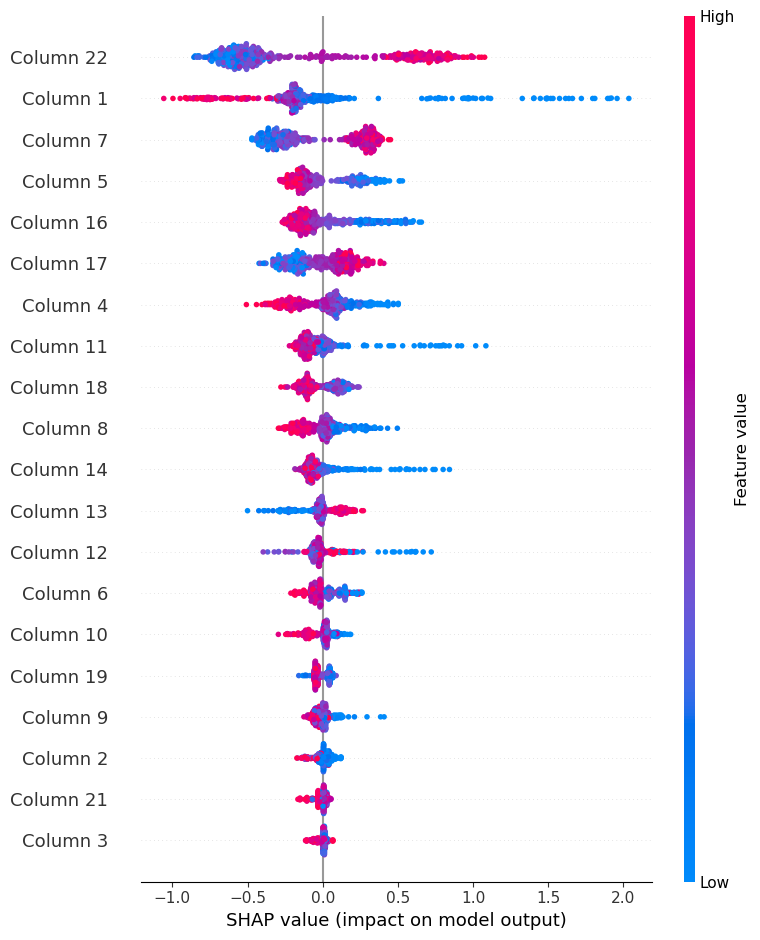

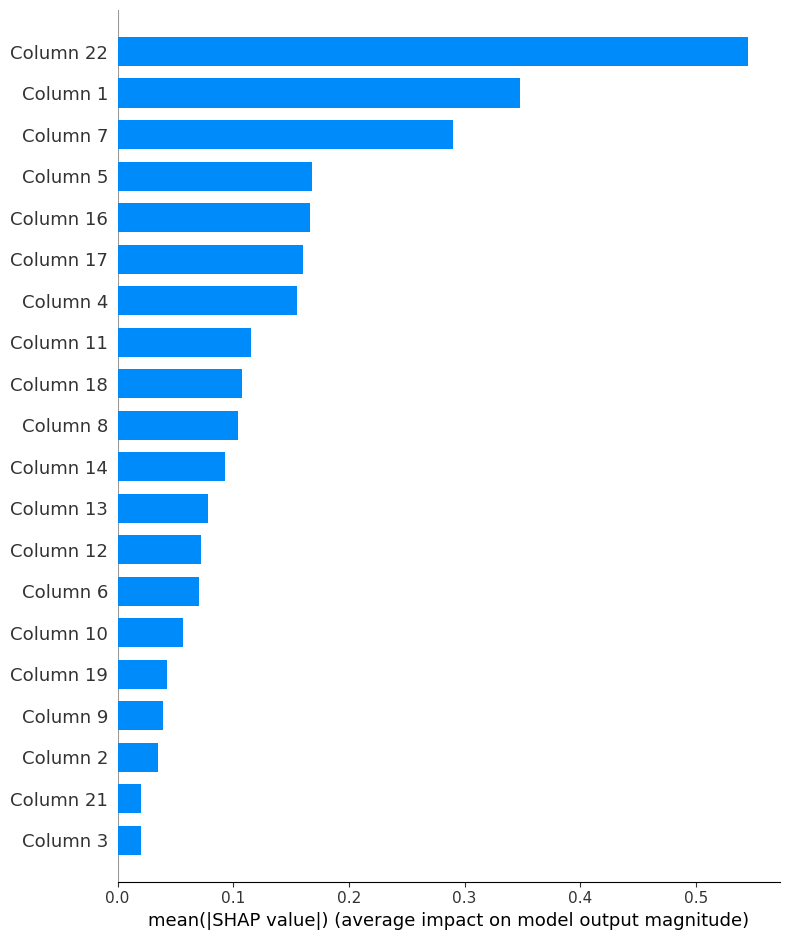

In [56]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test)

# Summary plot of feature importance
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


C:\Users\moyot\AppData\Local\Temp\ipykernel_34472\1120774093.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=shap_df['Importance'], y=shap_df['Feature'], palette="Blues_r")


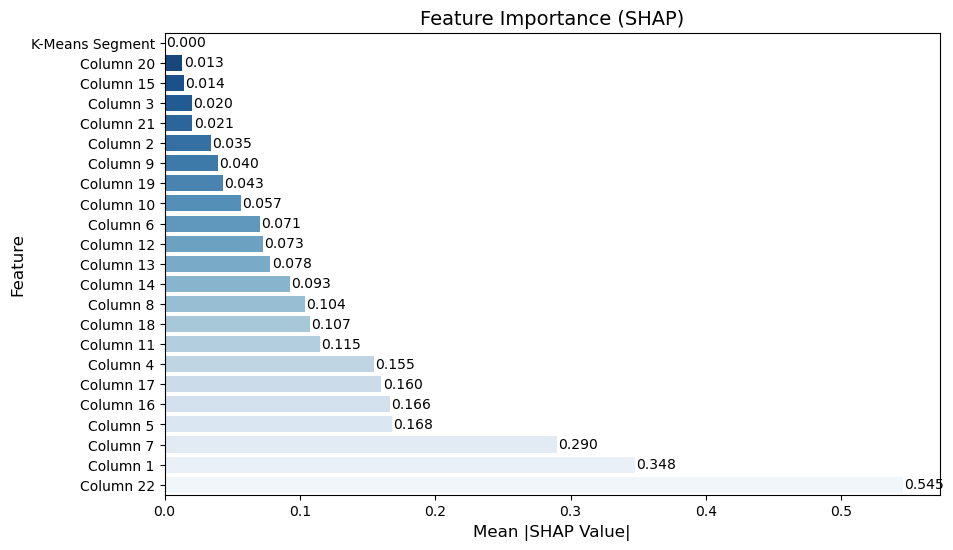

In [57]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test)

# Compute mean absolute SHAP values
shap_importance = np.abs(shap_values).mean(axis=0)
feature_names = X_test.columns

# Create DataFrame for sorting
shap_df = pd.DataFrame({'Feature': feature_names, 'Importance': shap_importance})
shap_df = shap_df.sort_values(by='Importance', ascending=True)

# Plot with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=shap_df['Importance'], y=shap_df['Feature'], palette="Blues_r")

# Add data labels
for index, value in enumerate(shap_df['Importance']):
    ax.text(value + 0.001, index, f"{value:.3f}", va='center', fontsize=10)

plt.xlabel("Mean |SHAP Value|", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importance (SHAP)", fontsize=14)
plt.show()

C:\Users\moyot\AppData\Local\Temp\ipykernel_34472\1981155855.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=shap_df['Importance'], y=shap_df['Feature'], palette="Blues_r")


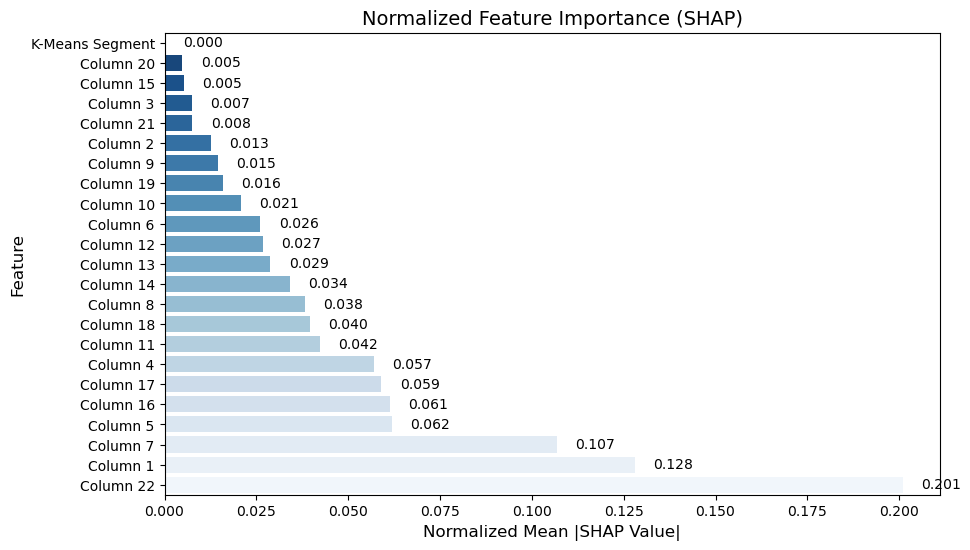

In [58]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test)

# Compute mean absolute SHAP values
shap_importance = np.abs(shap_values).mean(axis=0)

# Normalize so they sum to 1
shap_importance_norm = shap_importance / shap_importance.sum()

# Create DataFrame
feature_names = X_test.columns
shap_df = pd.DataFrame({'Feature': feature_names, 'Importance': shap_importance_norm})
shap_df = shap_df.sort_values(by='Importance', ascending=True)

# Plot with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=shap_df['Importance'], y=shap_df['Feature'], palette="Blues_r")

# Add data labels
for index, value in enumerate(shap_df['Importance']):
    ax.text(value + 0.005, index, f"{value:.3f}", va='center', fontsize=10)

plt.xlabel("Normalized Mean |SHAP Value|", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Normalized Feature Importance (SHAP)", fontsize=14)
plt.show()

In [59]:
ranked_columns_pca22 = pca_components.loc["PC22"].sort_values(ascending=False)
print(ranked_columns_pca22)

OverTime_Yes                        6.313157e-01
YearsAtCompany                      5.597664e-01
JobRole_Research Scientist          2.191474e-01
Gender_Male                         2.139651e-01
JobRole_Manager                     9.297993e-02
NumCompaniesWorked                  8.809990e-02
TrainingTimesLastYear               4.427962e-02
MaritalStatus_Married               4.121863e-02
BusinessTravel_Travel_Frequently    2.073757e-02
WorkLifeBalance                     1.702445e-02
Education                           1.651734e-02
JobInvolvement                      1.401195e-02
PerformanceRating                   1.268075e-02
JobRole_Research Director           1.054388e-02
DailyRate                           8.388386e-03
MonthlyRate                         7.109001e-03
JobRole_Human Resources             4.574994e-03
PercentSalaryHike                   3.514313e-03
DistanceFromHome                    1.922854e-03
StandardHours                      -1.110223e-16
HourlyRate          

In [60]:
ranked_columns_pca1 = pca_components.loc["PC1"].sort_values(ascending=False)
print(ranked_columns_pca1)

YearsAtCompany                      0.520615
YearsInCurrentRole                  0.492352
YearsWithCurrManager                0.487679
YearsSinceLastPromotion             0.426183
Age                                 0.222297
Education                           0.078037
JobRole_Manager                     0.041594
StockOptionLevel                    0.032657
MaritalStatus_Married               0.022562
JobRole_Research Director           0.021205
WorkLifeBalance                     0.016308
DistanceFromHome                    0.013458
PerformanceRating                   0.013264
RelationshipSatisfaction            0.011076
JobRole_Manufacturing Director      0.009790
EnvironmentSatisfaction             0.006400
BusinessTravel_Travel_Frequently    0.002430
JobInvolvement                      0.002415
StandardHours                      -0.000000
TrainingTimesLastYear              -0.003342
OverTime_Yes                       -0.006195
JobRole_Human Resources            -0.006421
PercentSal

In [61]:
ranked_columns_pca7 = pca_components.loc["PC7"].sort_values(ascending=False)
print(ranked_columns_pca7)

DistanceFromHome                    6.151437e-01
MonthlyRate                         4.249503e-01
HourlyRate                          5.431913e-02
Education                           3.150111e-02
OverTime_Yes                        2.957813e-02
YearsSinceLastPromotion             1.622967e-02
JobRole_Research Scientist          9.656618e-03
EnvironmentSatisfaction             7.352821e-03
MaritalStatus_Married               6.865247e-03
StockOptionLevel                    5.520077e-03
JobRole_Manufacturing Director      4.325232e-03
JobSatisfaction                     2.703461e-03
MaritalStatus_Single                1.538510e-03
StandardHours                      -1.110223e-16
YearsAtCompany                     -3.267703e-04
Gender_Male                        -9.298273e-04
BusinessTravel_Travel_Frequently   -1.420885e-03
JobRole_Laboratory Technician      -2.512809e-03
YearsWithCurrManager               -3.463544e-03
JobRole_Research Director          -4.412071e-03
JobRole_Human Resour

In [62]:
ranked_columns_pca5 = pca_components.loc["PC5"].sort_values(ascending=False)
print(ranked_columns_pca5)

JobSatisfaction                     5.155262e-01
EnvironmentSatisfaction             4.212704e-01
StockOptionLevel                    2.926299e-01
DailyRate                           2.612349e-01
MonthlyRate                         1.314308e-01
Age                                 9.822069e-02
NumCompaniesWorked                  9.658496e-02
MaritalStatus_Married               4.518966e-02
OverTime_Yes                        2.619835e-02
YearsInCurrentRole                  1.850167e-02
JobRole_Manufacturing Director      1.044376e-02
JobRole_Research Director           3.680137e-03
YearsSinceLastPromotion             3.619189e-03
JobRole_Manager                     3.341041e-03
Gender_Male                         1.987993e-03
StandardHours                       5.551115e-17
BusinessTravel_Travel_Frequently   -2.601007e-03
PercentSalaryHike                  -2.997280e-03
JobRole_Human Resources            -4.992174e-03
JobRole_Laboratory Technician      -9.097415e-03
JobRole_Research Sci

In [63]:
ranked_columns_pca5 = pca_components.loc["PC5"].sort_values(ascending=False)
print(ranked_columns_pca5)

JobSatisfaction                     5.155262e-01
EnvironmentSatisfaction             4.212704e-01
StockOptionLevel                    2.926299e-01
DailyRate                           2.612349e-01
MonthlyRate                         1.314308e-01
Age                                 9.822069e-02
NumCompaniesWorked                  9.658496e-02
MaritalStatus_Married               4.518966e-02
OverTime_Yes                        2.619835e-02
YearsInCurrentRole                  1.850167e-02
JobRole_Manufacturing Director      1.044376e-02
JobRole_Research Director           3.680137e-03
YearsSinceLastPromotion             3.619189e-03
JobRole_Manager                     3.341041e-03
Gender_Male                         1.987993e-03
StandardHours                       5.551115e-17
BusinessTravel_Travel_Frequently   -2.601007e-03
PercentSalaryHike                  -2.997280e-03
JobRole_Human Resources            -4.992174e-03
JobRole_Laboratory Technician      -9.097415e-03
JobRole_Research Sci